In [ ]:

!pip install pydantic
!pip install PyYAML
!pip install jinja2
!pip install visions
!pip install htmlmin
!pip install phik
!pip install requests
!pip install tqdm
!pip install seaborn
!pip install multimethod
!pip install statsmodels
!pip install typeguard
!pip install imagehash
!pip install wordcloud
!pip install dacite
!pip install numba

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
! python --version

Python 3.10.12


In [ ]:
import sys
!{sys.executable} -m pip install -U ydata-profiling
!jupyter nbextension enable --py widgetsnbextension


In [2]:
from google.colab import files
uploaded = files.upload()

Saving used_cars.csv to used_cars.csv


In [3]:
data_file = "used_cars.csv"
df= pd.read_csv(data_file)
df

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
4004,Bentley,Continental GT Speed,2023,714 mi.,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,"$349,950"
4005,Audi,S4 3.0T Premium Plus,2022,"10,900 mi.",Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,"$53,900"
4006,Porsche,Taycan,2022,"2,116 mi.",NaN,Electric,Automatic,Black,Black,None reported,NaN,"$90,998"
4007,Ford,F-150 Raptor,2020,"33,000 mi.",Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,"$62,999"


In [4]:
print(df.dtypes)


brand           object
model           object
model_year       int64
milage          object
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
price           object
dtype: object


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [6]:

df['milage'] = df['milage'].str.replace(r'\D', '', regex=True)
df['milage'] = df['milage'].astype(float)
df['price'] = df['price'].str.replace(r'\D', '', regex=True)
df['price'] = df['price'].astype(float)
df

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598.0
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500.0
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4004,Bentley,Continental GT Speed,2023,714.0,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,349950.0
4005,Audi,S4 3.0T Premium Plus,2022,10900.0,Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,53900.0
4006,Porsche,Taycan,2022,2116.0,NaN,Electric,Automatic,Black,Black,None reported,NaN,90998.0
4007,Ford,F-150 Raptor,2020,33000.0,Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,62999.0


In [ ]:
df.isna().sum()
#df.dtypes


brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

In [7]:
df['accident'] = df['accident'].replace({'At least 1 accident or damage reported' : 'Yes',
'None reported': 'No'})
df['clean_title'] = df['clean_title'].fillna('No')
#this last part is done by me
df['accident'] = df['accident'].fillna('No')
df

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,Yes,Yes,10300.0
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,Yes,Yes,38005.0
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,No,No,54598.0
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,No,Yes,15500.0
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,No,No,34999.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4004,Bentley,Continental GT Speed,2023,714.0,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,No,Yes,349950.0
4005,Audi,S4 3.0T Premium Plus,2022,10900.0,Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,No,Yes,53900.0
4006,Porsche,Taycan,2022,2116.0,NaN,Electric,Automatic,Black,Black,No,No,90998.0
4007,Ford,F-150 Raptor,2020,33000.0,Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,No,Yes,62999.0


<Axes: xlabel='fuel_type', ylabel='count'>

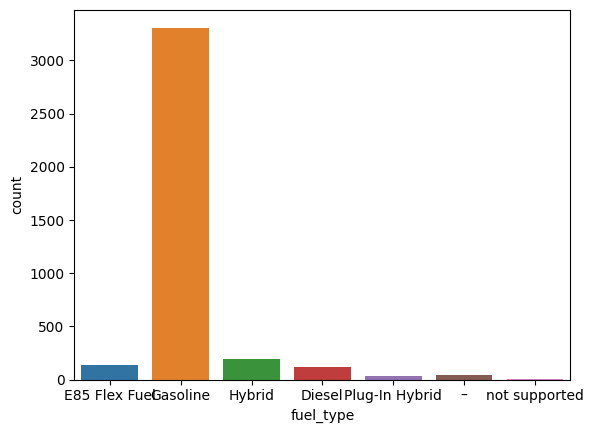

In [ ]:
sns.countplot(x = 'fuel_type', data = df)

In [ ]:
df['fuel_type'] = df['fuel_type'].fillna('Gasoline')
df

In [ ]:
df.isna().sum()
#df.dtypes


brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [ ]:
df.dtypes

brand            object
model            object
model_year        int64
milage          float64
fuel_type        object
engine           object
transmission     object
ext_col          object
int_col          object
accident         object
clean_title      object
price           float64
dtype: object

In [ ]:
Current_Year = 2023
df['age'] = Current_Year - df['model_year']
df['age'] = df['age'].astype(np.int64)
df

In [10]:
df_new = df.drop(['model_year'], axis=1)
df_new

,brand,model,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,age
0,Ford,Utility Police Interceptor Base,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,Yes,Yes,10300.0,10
1,Hyundai,Palisade SEL,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,Yes,Yes,38005.0,2
2,Lexus,RX 350 RX 350,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,No,No,54598.0,1
3,INFINITI,Q50 Hybrid Sport,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,No,Yes,15500.0,8
4,Audi,Q3 45 S line Premium Plus,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,No,No,34999.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
4004,Bentley,Continental GT Speed,714.0,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,No,Yes,349950.0,0
4005,Audi,S4 3.0T Premium Plus,10900.0,Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,No,Yes,53900.0,1
4006,Porsche,Taycan,2116.0,Gasoline,Electric,Automatic,Black,Black,No,No,90998.0,1
4007,Ford,F-150 Raptor,33000.0,Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,No,Yes,62999.0,3


In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Car Selling price Distribution Plot')
sns.distplot(df_new['price'])
sns.set_style('darkgrid')

plt.subplot(1,2,2)
plt.title('Car Selling price Spread')
sns.boxplot(y=df_new['price'])
sns.set_style('darkgrid')

plt.show()

In [ ]:
# plotting the target-age scatter graph
sns.scatterplot(data=df_new, x="age", y="price")
sns.set_style('darkgrid')
plt.title("Selling price by age", size=12)
plt.ylabel("Selling price (Thousand bucks)", size=10)
plt.xlabel("Age", size=10)
plt.show()

In [ ]:
#Distribution
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Car Milage Plot')
sns.distplot(df_new.milage, color='green')

#Spread
plt.subplot(1,2,2)
plt.title('Car milage Spread')
sns.boxplot(y=df_new.milage)

plt.show()

In [ ]:
df_sym = pd.DataFrame(df_new['accident'].value_counts())
df_sym.plot.pie(subplots=True, labels = df_sym.index.values, autopct='%1.1f%%', fontsize=8)
# Unsquish the pie.
plt.gca().set_aspect('equal')
plt.show()

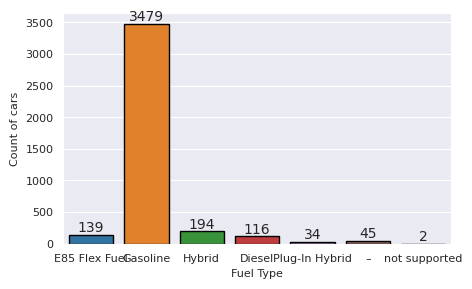

In [ ]:
# Count of cars by fuel_type
plt.figure(figsize = (5, 3))
ax=sns.countplot(data=df_new, x=df.fuel_type, ec='black')
sns.set_style('darkgrid')
for cont in ax.containers:
    ax.bar_label(cont)
plt.ylabel('Count of cars', size=8)
plt.yticks(size=8)
plt.xlabel('Fuel Type', size=8)
plt.xticks(size=8)
plt.show()

In [ ]:
# plotting the target-Fuel type scatter graph
sns.scatterplot(data=df_new, x="fuel_type", y="price")
sns.set_style('darkgrid')
plt.title("Fuel type vs. Selling price", size=10)
plt.ylabel("Selling price (Thousand bucks)", size=8)
plt.xlabel("Fuel type", size=8)
plt.show()

In [ ]:
obj_cols = [col for col in df_new.columns if df_new[col].dtypes == 'O']
print('Number of Qualitative Variable: ', len(obj_cols))

def bar_charts(data, obj_cols):
    col_counter = 0
    data = df_new.copy()
    for col in obj_cols:
      data[col].value_counts().plot(kind = "bar",figsize=(10,2),fontsize=10)
      plt.xlabel(col)
      plt.title(col)
      plt.show()
      col_counter += 1
    print(col_counter, "variables have been plotted")

bar_charts(df_new, obj_cols)

In [ ]:
num_cols = [col for col in df_new.columns if df_new[col].dtypes != 'O']
print('Number of Numerical Variable: ', len(num_cols))


def hist_for_nums(data, numeric_cols):
    col_counter = 0
    data = data.copy()
    for col in numeric_cols:
        data[col].plot.hist(alpha=0.5, color='y')
        plt.xlabel(col)
        plt.title(col)
        plt.show()
        col_counter += 1
    print(col_counter, "variables have been plotted")
hist_for_nums(df_new, num_cols)

In [ ]:
import ydata_profiling
from ydata_profiling import ProfileReport
profile = ProfileReport(df)

In [ ]:
profile

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for x in df_new.columns:
    if df_new[x].dtypes=='object':
       df_new[x]=le.fit_transform(df_new[x].astype(str))
corr = df_new.corr()
corr

In [12]:

df_new

,brand,model,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,age
0,14,1743,51000.0,1,581,16,29,14,1,1,10300.0,10
1,19,1182,34742.0,2,566,32,185,71,1,1,38005.0,2
2,27,1325,22372.0,2,541,40,38,14,0,0,54598.0,1
3,20,1242,88900.0,3,724,23,29,14,0,1,15500.0,8
4,3,1225,9835.0,2,200,32,120,14,0,0,34999.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
4004,5,484,714.0,2,1060,33,50,75,0,1,349950.0,0
4005,3,1464,10900.0,2,714,59,29,14,0,1,53900.0,1
4006,43,1677,2116.0,2,1133,40,29,14,0,0,90998.0,1
4007,14,666,33000.0,2,917,38,38,14,0,1,62999.0,3


In [13]:
X = df_new.iloc[:, list(range(10)) + [-1]]
y = df_new.iloc[:, -2]

In [ ]:
X
#y

In [14]:
import statsmodels as sm
from statsmodels.api import OLS
from statsmodels.api import add_constant

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 1)
X_train = add_constant(X_train)
X_test = add_constant(X_test)

In [ ]:

#fit linear regression model

OLS_model = OLS(y_train, X_train).fit()

#view model summary
print(OLS_model.summary())

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3207, 12)
(802, 12)
(3207,)
(802,)


In [17]:
from sklearn.linear_model import LinearRegression
# Create an instance of the LinearRegression class
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)
score_LR = reg.score(X_test, y_test)

print(score_LR)

0.3191546734509779


In [ ]:
# Print the coefficients and intercept of the model
print(reg.coef_)
print('Intercept: ', reg.intercept_)

[ 0.00000000e+00  2.11754287e+02 -1.51749000e+00 -3.82413150e-01
 -4.68630937e+03  6.12280708e+01  1.86939042e+02  5.33937334e+00
  6.73130085e+01 -2.26895985e+03 -3.41477166e+03  1.45479648e+02]
Intercept:  31951.61963787728


In [18]:
y_pred = reg.predict(X_test)
#First five preditions
#y_pred = reg.predict(X_test)[0:5]
#y_pred

In [19]:
import math
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
#rmse = math.sqrt(mse)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 22922.871783004957
MSE: 1825516368.7970448
RMSE: 42726.061938786785


In [20]:
#Cross avlidation for Linear Regression

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import absolute
from numpy import sqrt

In [21]:
#Cross avlidation for Linear Regression on training set
#define cross-validation method to use
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#use k-fold CV to evaluate linear Regression model
scores = cross_val_score(reg, X_train, y_train, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
score = cross_val_score(reg, X_train, y_train, scoring='r2',
                         cv=cv, n_jobs=-1)

print(mean(score))

#view mean absolute error
print(mean(absolute(scores)))
#view RMSE
print(sqrt(mean(absolute(scores))))

0.24649214463535812
23903.8261184643
154.60862239365662


In [22]:
#Cross avlidation for Linear Regression (On test set)
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#use k-fold CV to evaluate linear Regression model
scores = cross_val_score(reg, X_test, y_test, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
score = cross_val_score(reg, X_test, y_test, scoring='r2',
                         cv=cv, n_jobs=-1)

print(mean(score))

#view mean absolute error
print(mean(absolute(scores)))
#view RMSE
print(sqrt(mean(absolute(scores))))

0.3304022253035129
22190.884699786868
148.96605217225456


In [23]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
RF_regressor = RandomForestRegressor(n_estimators= 10, random_state= 0)
RF_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [24]:
#Predicting the target values of the test set
y_pred_RF = RF_regressor.predict(X_test)
score_RF = RF_regressor.score(X_test, y_test)
print(score_RF)
#MSE
mse = float(mean_squared_error(y_test, y_pred_RF))
rmse = float(mean_squared_error(y_test, y_pred_RF, squared = False))
print("MSE: ", mse)
# RMSE (Root Mean Square Error)
#rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred_RF)), '.3f'))
print("\nRMSE: ", rmse)

0.440490377885139
MSE:  1500185040.3339524

RMSE:  38732.22224884537


In [25]:
# Random forets with Cross Validation (On training set)
scores_RF = cross_val_score(RF_regressor, X_train, y_train, scoring='neg_mean_absolute_error',
                         cv=10)
score_RF = cross_val_score(RF_regressor, X_train, y_train, scoring='r2',
                         cv=cv, n_jobs=-1)
print(mean(score_RF))
#view mean absolute error
print(mean(absolute(scores_RF)))
#view RMSE
print(sqrt(mean(absolute(scores_RF))))

0.032566581058069956
16790.1474208528
129.576801244871


In [26]:
# Random forets with Cross Validation (On testing set)
scores_RF = cross_val_score(RF_regressor, X_test, y_test, scoring='neg_mean_absolute_error',
                         cv=10)
score_RF = cross_val_score(RF_regressor, X_test, y_test, scoring='r2',
                         cv=cv, n_jobs=-1)
print(mean(score_RF))
#view mean absolute error
print(mean(absolute(scores_RF)))
#view RMSE
print(sqrt(mean(absolute(scores_RF))))

0.5569469417488535
15305.532827160496
123.71553187518734


In [27]:
#KNN Regression
from sklearn.neighbors import KNeighborsRegressor

# Instance and fit
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Score
score_knn = knn_model.score(X_test, y_test)
print(score_knn)



-0.10260211256746499


In [ ]:
preds = knn_model.predict(X_test)

# Performance
performance = pd.DataFrame({ 'True Value': y_test,
                            'Prediction': preds,
                            'Error': y_test - preds})
# View
performance

In [29]:
MSE = mean_squared_error(y_test, preds)
RMSE = mean_squared_error(y_test, preds, squared=False)
print('MSE:', MSE)
print('RMSE:', RMSE)

MSE: 2956351650.329177
RMSE: 54372.34269671647


In [30]:
#Cross validation on training set
from sklearn.model_selection import cross_val_score
#create a new KNN model
knn_scores = cross_val_score(knn_model, X_train, y_train, scoring='neg_mean_absolute_error',
                         cv=10)
knn_score = cross_val_score(knn_model, X_train, y_train, scoring='r2',
                         cv=10)

print(mean(knn_score))
#print('knn_scores mean:{}'.format(np.mean(cv_scores)))
#view mean absolute error
print(mean(absolute(knn_scores)))
#view RMSE
print(sqrt(mean(absolute(knn_scores))))

0.08251636475621885
22904.264565031153
151.34154936775013


In [31]:
#Cross validation on testing set

knn_scores = cross_val_score(knn_model, X_test, y_test, scoring='neg_mean_absolute_error',
                         cv=10)
knn_score = cross_val_score(knn_model, X_test, y_test, scoring='r2',
                         cv=10)

print(mean(knn_score))
#print('knn_scores mean:{}'.format(np.mean(cv_scores)))
#view mean absolute error
print(mean(absolute(knn_scores)))
#view RMSE
print(sqrt(mean(absolute(knn_scores))))

0.29580015419224237
21771.140990740743
147.55046930030667


In [ ]:
#model Comparison
""""pd.DataFrame({'Linear Regression':[score_LR],
              'Random forest Regression': [score_RF],
              'KNN Regression': [score_knn]})


In [32]:
features = ['milage','age', 'accident']
X = df_new.loc[:, features]
y = df_new.loc[:, ['price']]

In [34]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 1)


In [35]:
# Create an instance of the LinearRegression class
L_reg = LinearRegression()

# Fit the model to the data
L_reg.fit(X_train, y_train)
L_score = L_reg.score(X_test, y_test)
print(L_score)


0.18699535268341005


In [36]:
y_pred = L_reg.predict(X_test)

In [37]:
L_mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
L_mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
L_rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
print(L_mse)
print(L_rmse)


2179868515.9626217
46689.062059144235


In [38]:
#Random Forest Regressor
R_regressor = RandomForestRegressor(n_estimators= 10, random_state= 0)
R_regressor.fit(X_train, y_train)

<ipython-input-38-0e370bea7b76>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  R_regressor.fit(X_train, y_train)


RandomForestRegressor(n_estimators=10, random_state=0)

In [39]:
#Predicting the target values of the test set
y_pred_R = R_regressor.predict(X_test)
score_R = R_regressor.score(X_test, y_test)
print(score_R)
#MSE
R_mse = float(mean_squared_error(y_test, y_pred_R))
R_rmse = float(mean_squared_error(y_test, y_pred_R, squared = False))
print("MSE: ", R_mse)
# RMSE (Root Mean Square Error)
#rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred_RF)), '.3f'))
print("\nRMSE: ", R_rmse)

-0.011120052129570457
MSE:  2711065397.6833167

RMSE:  52067.89219551063


In [40]:
#KNN regression
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

# Score
knn_score = knn_reg.score(X_test, y_test)
print(knn_score)

0.04948506488675841


In [41]:
predicted_value = knn_reg.predict(X_test)

In [42]:
KNN_MSE = mean_squared_error(y_test, predicted_value)
KNN_RMSE = mean_squared_error(y_test, predicted_value, squared=False)
print('MSE:', KNN_MSE)
print('RMSE:', KNN_RMSE)

MSE: 2548567942.1937656
RMSE: 50483.343215299894
